First 5 rows:
   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0  

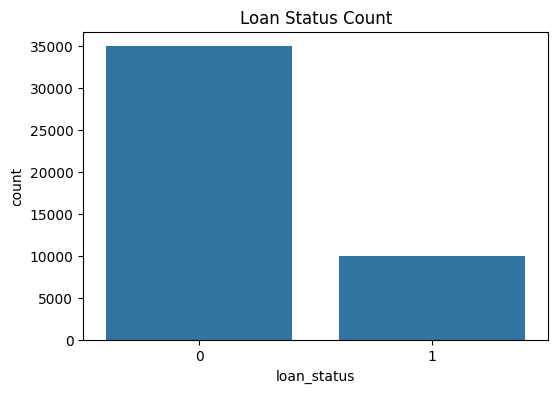

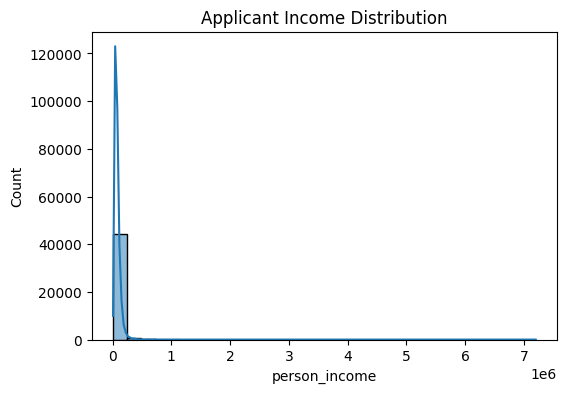

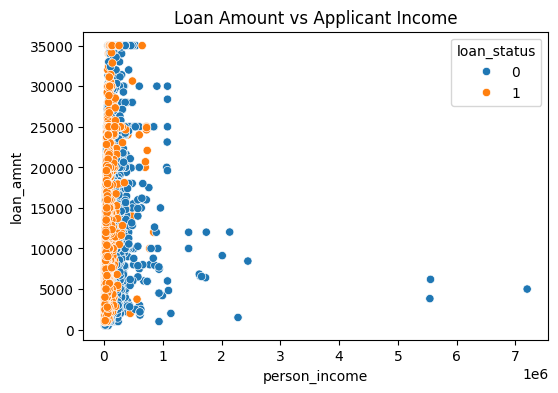

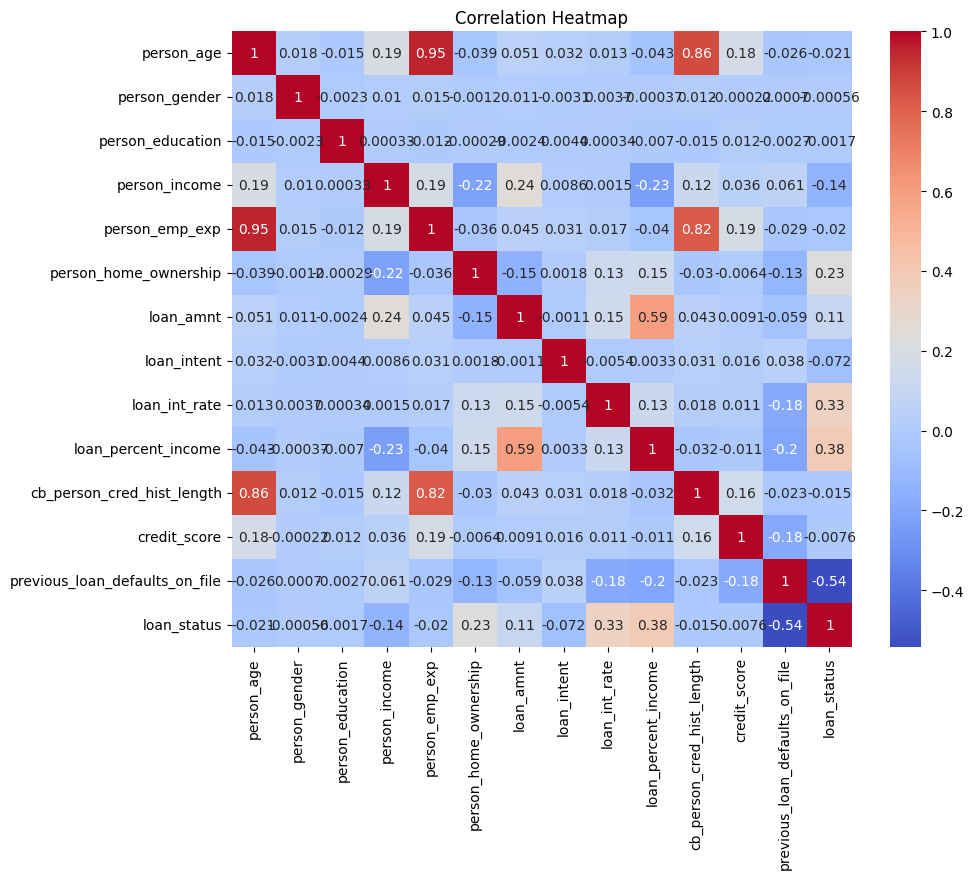


--- Random Forest Model Evaluation ---
Accuracy: 0.9281
Precision: 0.8879
Recall: 0.7761
F1 Score: 0.8282
ROC-AUC: 0.9735

Confusion Matrix:
[[6793  197]
 [ 450 1560]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6990
           1       0.89      0.78      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000


--- Decision Tree Model Evaluation ---
Accuracy: 0.8984
Precision: 0.7740
Recall: 0.7701
F1 Score: 0.7721
ROC-AUC: 0.8527

Confusion Matrix:
[[6538  452]
 [ 462 1548]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      6990
           1       0.77      0.77      0.77      2010

    accuracy                           0.90      9000
   macro avg       0.85      0.85      0.85      9000
weighted avg   

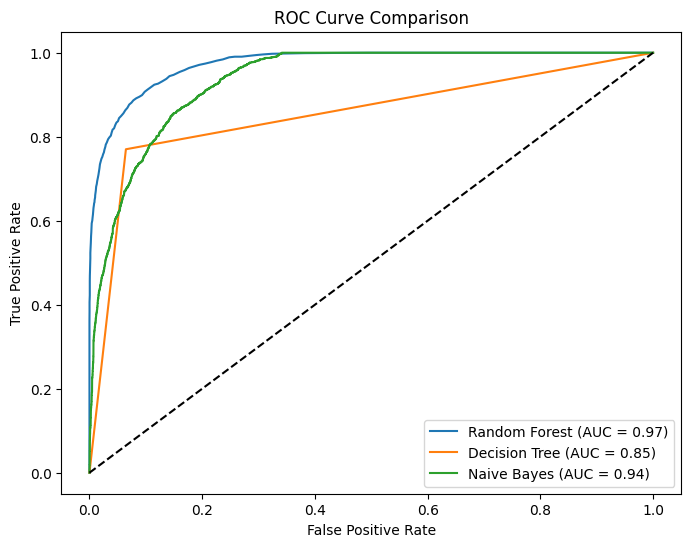

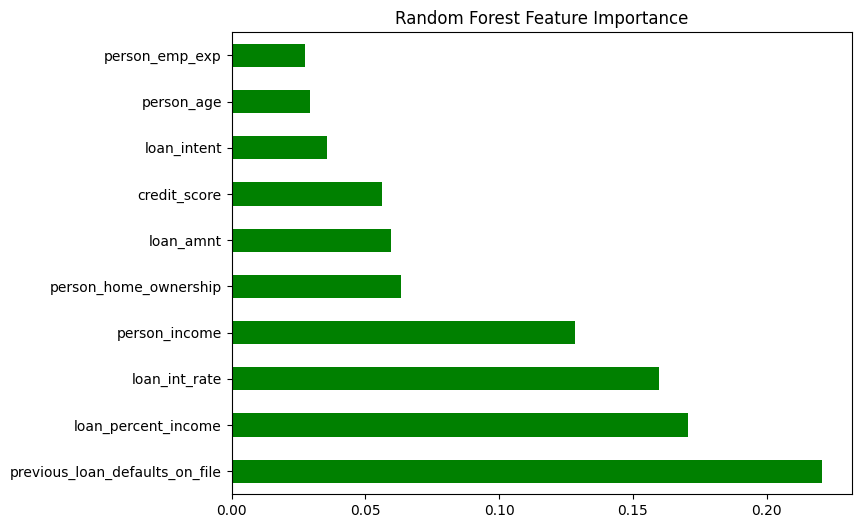


Best performing model (based on Accuracy): Random Forest


In [8]:
# ----------------------------------------------
# Loan Status Prediction Project - Complete Workflow
# Including Data Visualization, Multiple Models, and Evaluation
# ----------------------------------------------

# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, classification_report, roc_auc_score, roc_curve)

# 2. Load dataset
df = pd.read_csv("loan_data.csv")  # Replace with your dataset path
print("First 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

# 3. Encode categorical variables
categorical_cols = ['person_gender', 'person_education', 'person_home_ownership',
                    'loan_intent', 'previous_loan_defaults_on_file']
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# 4. Data Visualization

# a) Bar plot - Loan Status distribution
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=df)
plt.title('Loan Status Count')
plt.show()

# b) Histogram - Applicant Income
plt.figure(figsize=(6,4))
sns.histplot(df['person_income'], bins=30, kde=True)
plt.title('Applicant Income Distribution')
plt.show()

# c) Scatterplot - Loan Amount vs Applicant Income colored by Loan Status
plt.figure(figsize=(6,4))
sns.scatterplot(x='person_income', y='loan_amnt', hue='loan_status', data=df)
plt.title('Loan Amount vs Applicant Income')
plt.show()

# d) Correlation heatmap (numeric features)
plt.figure(figsize=(10,8))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 5. Split dataset
X = df.drop(['loan_status'], axis=1)
y = df['loan_status']

# Optional: scale features for Naive Bayes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Train models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB()
}

predictions = {}
roc_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else y_pred
    
    predictions[name] = y_pred
    
    # Evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    
    roc_scores[name] = (y_test, y_prob)
    
    print(f"\n--- {name} Model Evaluation ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {auc:.4f}")
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

# 7. Compare ROC Curves
plt.figure(figsize=(8,6))
for name, (y_true, y_prob) in roc_scores.items():
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_true, y_prob):.2f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# 8. Feature importance for Random Forest
rf_model = models['Random Forest']
feat_importances = pd.Series(rf_model.feature_importances_, index=df.drop(['loan_status'], axis=1).columns)
plt.figure(figsize=(8,6))
feat_importances.nlargest(10).plot(kind='barh', color='green')
plt.title("Random Forest Feature Importance")
plt.show()

# 9. Conclusion: Best model based on Accuracy and AUC
best_model_name = max(models, key=lambda name: accuracy_score(y_test, predictions[name]))
print(f"\nBest performing model (based on Accuracy): {best_model_name}")


In [1]:
import os
print(os.getcwd())

C:\Users\alain
